### CatDog Viz

#### Import Packages

In [1]:
import pandas as pd
from vizmath import vmath, points

#### Read in Data Source (sourced from Google Trends)

In [3]:
# From Google Trends: 2004-2023 popularity between searches for Pet Cat or Dog compared to other common pets (rabbit,fish,bird) for 32 countries that returned data
df = pd.read_csv('catsdogs.csv') # pandas read
df.head() # preview data: Country (will visualize each country's flag), cat (search %), dog (search %)

,Country,cat,dog
0,Australia,0.20,0.61
1,United States,0.22,0.63
2,Canada,0.26,0.59
3,United Kingdom,0.25,0.57
4,New Zealand,0.28,0.52


#### Setup some vizmath classes and drawing variables

In [4]:
vm = vmath() # will use to call some vizmath functions
catdog_flags = points() # vizmath object to hold data for drawing nation flags
catdog_sigmoid = points() # vizmath object to hold data for drawing cat-dog connections
x_max = df.shape[0] # save the row count (number of countries)
y_min = 1 # setup an offset to use as a radius
x = 0 # setup an offset to draw seperate each country

#### Loop through each row (country) in the dataset and draw points to represent the data 

In [5]:
for i, row in df.sort_values(by=['cat'], ascending=False).iterrows(): # sort values by the cat percentage
    x += 1 # start at 1 and increment at 1
    y_cat = row['cat'] # cat percentage
    y_dog = row['dog'] # dog percentage
    country = row['Country'] # country

    cs = 1 # setup a jitter order constant in case of 2 points (a country's cat and dog values) being too close together
    if y_cat < y_dog: # adjust constant based on the animal with the higher value
        cs = -1
    xci = x+.15*cs # jitter by a placement constant of .15 for cats
    xdi = x+.15*(-cs) # same as above for dogs
    xc,yc=vm.polarize(xci,x_max,y_cat+y_min) # use the vizmath function to convert cartesian to polar coordinates (cats)
    xd,yd=vm.polarize(xdi,x_max,y_dog+y_min) # same as above (dogs)

    xf,yf=vm.polarize(x,x_max,-0.065+y_min) # use the vizmath function to convert cartesian to polar (country flags)
    catdog_flags.append(id=country,x=xc,y=yc,path=0,animal='cat',value=y_cat,country=country) # add data to vizmath object for cats
    catdog_flags.append(id=country,x=xd,y=yd,path=1,animal='dog',value=y_dog,country=country) # same for dogs
    catdog_flags.append(id=country,x=xf,y=yf,path=-1,animal='flag',value=0,country=country) # same for country flags

    sig = vm.sigmoid(xci, y_cat+y_min, xdi, y_dog+y_min, 20, orientation = 'v', limit = 4) # use the vizmath function to draw points along a sigmoid path
    sp = 1 # setup a sigmoid point id
    y_diff = abs(y_cat-y_dog) # get the seperation value between each cat and dog as an interesting data point to store
    for sx, sy in sig: # iterate through each sigmoid point
        sxp,syp=vm.polarize(sx,x_max,sy) # convert each sgmoid point to polar coordinates
        catdog_sigmoid.append(id=country,x=sxp,y=syp,path=sp,animal='connection',value=y_diff,country=country) # add data to vizmath object for connections
        sp += 1 # iterate the sigmoid point id

#### Plot the vizmath object containing the data for cats, dogs, and country flags

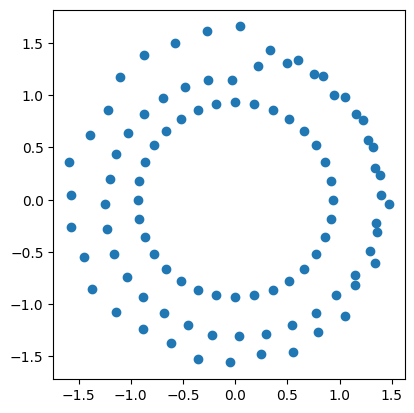

In [6]:
catdog_flags.plot_xy()

#### Plot the vizmath object containing the data for cat-dog connections

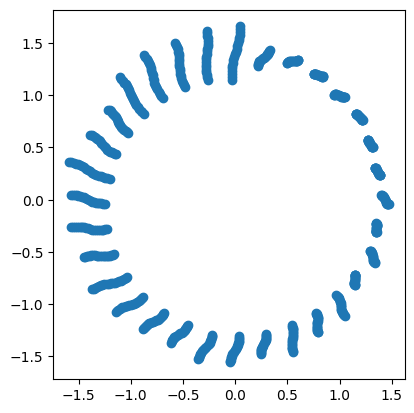

In [7]:
catdog_sigmoid.plot_xy()

#### Create dataframe from both vizmath objects and rescale each to a 2-unit space around 0,0

In [11]:
catdog_flags.to_dataframe() # add a dataframe version of the data to the vizmath object
catdog_flags.dataframe_rescale(xmin=-2,xmax=2,ymin=-2,ymax=2) # rescale the x-y space (for Tableau's map layers)

catdog_sigmoid.to_dataframe() # same as above
catdog_sigmoid.dataframe_rescale(xmin=-2,xmax=2,ymin=-2,ymax=2) # same as above

In [12]:
catdog_flags.df.head() # preview the dataframe

,animal,country,id,path,value,x,y
0,cat,Saudi Arabia,Saudi Arabia,0,0.47,0.164558,0.716342
1,dog,Saudi Arabia,Saudi Arabia,1,0.30,0.107980,0.640968
2,flag,Saudi Arabia,Saudi Arabia,-1,0.00,0.091205,0.458517
3,cat,Türkiye,Türkiye,0,0.47,0.301147,0.670474
4,dog,Türkiye,Türkiye,1,0.40,0.248718,0.654324


In [13]:
catdog_sigmoid.df.head() # preview the dataframe

,animal,country,id,path,value,x,y
0,connection,Saudi Arabia,Saudi Arabia,1,0.17,0.164558,0.716342
1,connection,Saudi Arabia,Saudi Arabia,2,0.17,0.163158,0.712073
2,connection,Saudi Arabia,Saudi Arabia,3,0.17,0.161569,0.707847
3,connection,Saudi Arabia,Saudi Arabia,4,0.17,0.159711,0.703682
4,connection,Saudi Arabia,Saudi Arabia,5,0.17,0.157482,0.699599


#### Write out the vizmath dataframes to csv files

In [14]:
catdog_flags.df.to_csv('catsdogs_radial.csv', encoding='utf-8', index=False) # pandas write
catdog_sigmoid.df.to_csv('catsdogs_radial_connections.csv', encoding='utf-8', index=False) # pandas write

#### Create a background to finish out the viz

In [15]:
radial_background = points() # vizmath object to hold the data
for i in (0., 0.5, 1.): # let's create 3 circles a reference lines in the viz
    circle_point_list = vm.circle(0, 0, points=300, r=i+y_min, end_cap=True) # vizmath function for creating circle points
    for cp in circle_point_list: # loop through each circle point
        radial_background.append(id=i, x=cp[0], y=cp[1], path=cp[2]) # add data to the vizmath object
radial_background.to_dataframe() # add a dataframe version of the data to the vizmath object
radial_background.dataframe_rescale(xmin=-2,xmax=2,ymin=-2,ymax=2) # rescale the x-y space (for Tableau's map layers)
radial_background.df.head() # preview dataframe

,id,path,x,y
0,0.0,1,0.000000,0.500000
1,0.0,2,0.010471,0.499890
2,0.0,3,0.020938,0.499561
3,0.0,4,0.031395,0.499013
4,0.0,5,0.041839,0.498246


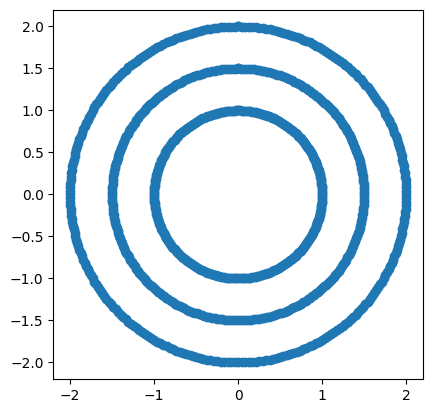

In [16]:
radial_background.plot_xy() # plot the vizmath object

In [17]:
radial_background.df.to_csv('catsdogs_radial_background.csv', encoding='utf-8', index=False) # pandas write

#### All done, bring the csv files into Tableau and add the points to map layers!